# Segmentación Simple por Color
## Ejemplo introductorio para procesamiento de imágenes

In [1]:
# Bibliotecas necesarias
import numpy as np
from cv2 import imread
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [2]:
# Función para analizar características de la imagen
def info_img(img):
    print('tamaño =', img.shape)
    print('máximo =', np.max(img))
    print('mínimo =', np.min(img))

In [3]:
# Descarga y lectura de imagen
!wget https://cdn.pixabay.com/photo/2016/02/19/19/29/balloons-1211008_640.jpg

--2025-04-22 23:48:24--  https://cdn.pixabay.com/photo/2016/02/19/19/29/balloons-1211008_640.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 172.64.147.160, 104.18.40.96, 2606:4700:4400::6812:2860, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|172.64.147.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46939 (46K) [image/jpeg]
Saving to: ‘balloons-1211008_640.jpg’

balloons-1211008_64 100%[===================>]  45.84K  --.-KB/s    in 0.01s   

2025-04-22 23:48:25 (3.90 MB/s) - ‘balloons-1211008_640.jpg’ saved [46939/46939]



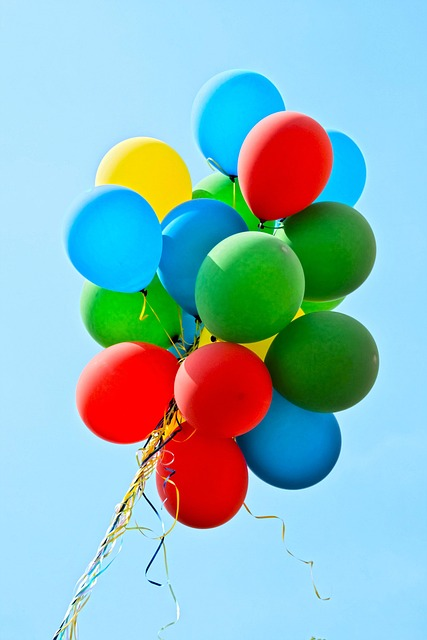

tamaño = (640, 427, 3)
máximo = 255
mínimo = 0


In [4]:
img_cv = imread('balloons-1211008_640.jpg')      # formato opencv (BGR)
cv2_imshow(img_cv)
info_img(img_cv)

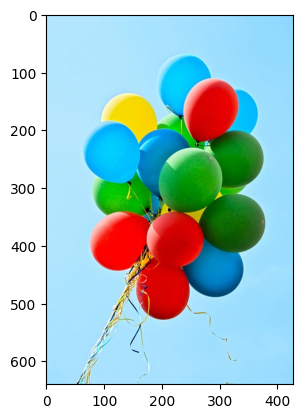

In [5]:
# Conversión BGR a RGB
img = img_cv[:,:,[2,1,0]]          # BGR a RGB
plt.imshow(img)
plt.show()

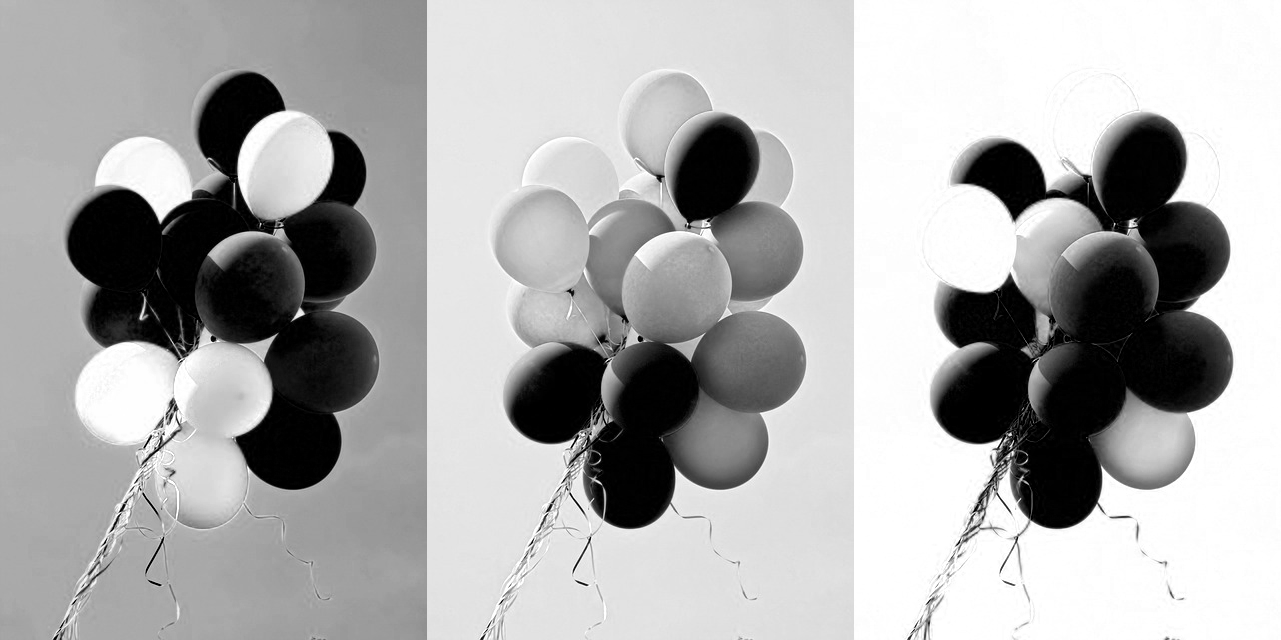

In [6]:
# Separación de canales de color
rojo = img[:,:,0]
verde = img[:,:,1]
azul = img[:,:,2]
canales = np.concatenate((rojo,verde,azul),axis=1)
cv2_imshow(canales)

tamaño = (640, 427)
máximo = 253
mínimo = 0


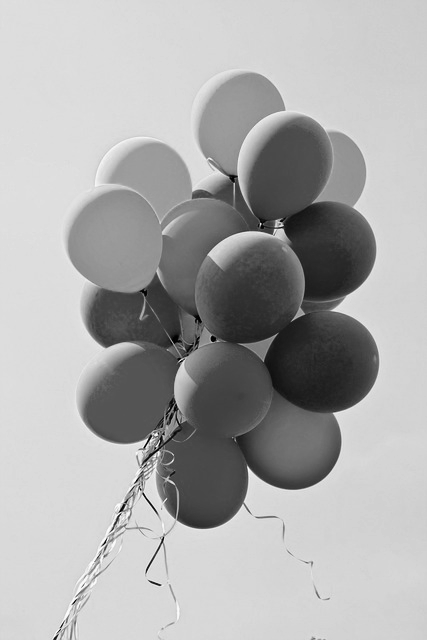

In [7]:
# Conversión a escala de grises
rojo_f = rojo.astype(float)
verde_f = verde.astype(float)
azul_f = azul.astype(float)
# Promedio ponderado
peso = (1/3,1/3,1/3)
#peso = (0.1,0.4,0.5)  # pesos alternativos
gris_f = peso[0]*rojo_f + peso[1]*verde_f + peso[2]*azul_f
gris = gris_f.astype(int)
info_img(gris)
cv2_imshow(gris)

In [8]:
# Función para mostrar histograma
def histograma(X):
    (N,M) = X.shape
    n = 256
    h = np.zeros((256,))
    for i in range(N):
        for j in range(M):
            x = X[i,j]
            h[x] = h[x]+1
    plt.plot(range(n),h[0:n])
    plt.title('Histograma')
    plt.xlabel('Valor de pixel')
    plt.ylabel('Frecuencia')
    plt.show()

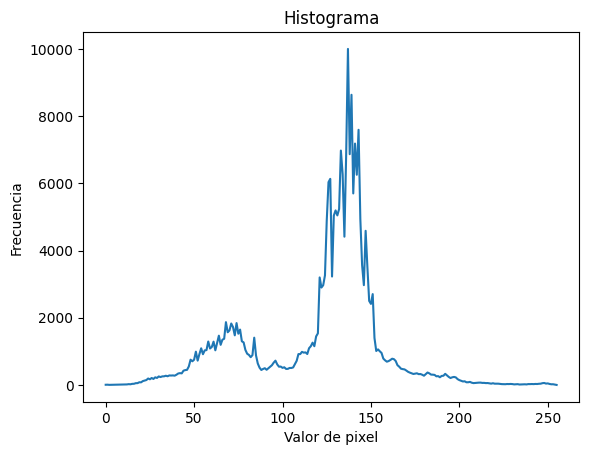

In [ ]:
histograma(gris)

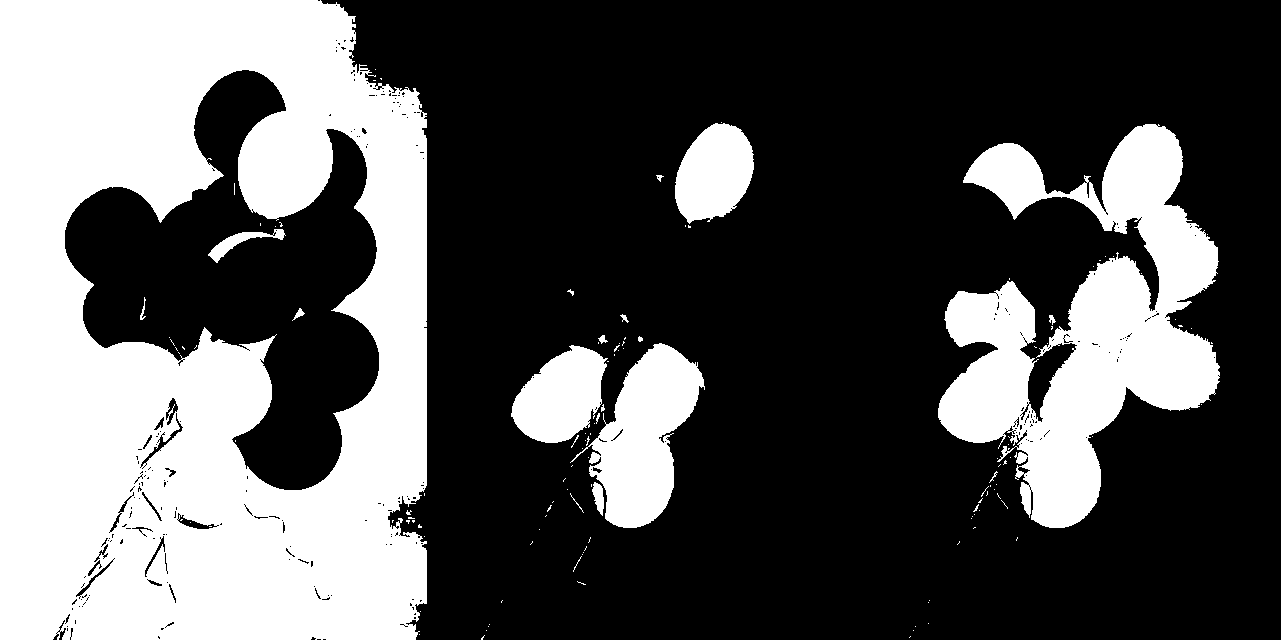

In [9]:
# Segmentación de la flor roja
seg_r = rojo>150
seg_v = verde<40
seg_a = azul<40
seg_rgb = np.concatenate((seg_r,seg_v,seg_a),axis=1)
cv2_imshow(seg_rgb*255)

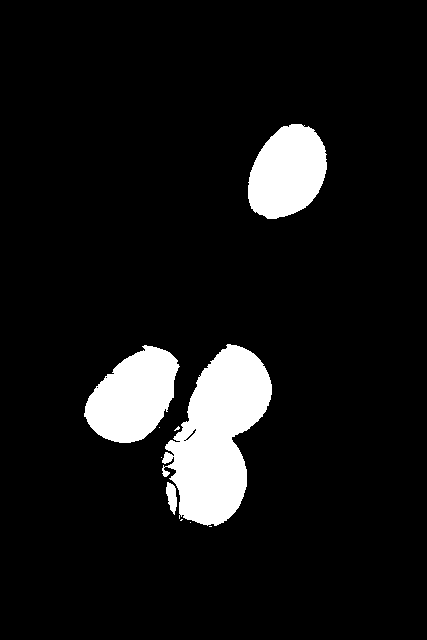

In [10]:
seg_rv = np.logical_and(seg_r,seg_v)
seg = np.logical_and(seg_rv,seg_a)
cv2_imshow(seg*255)

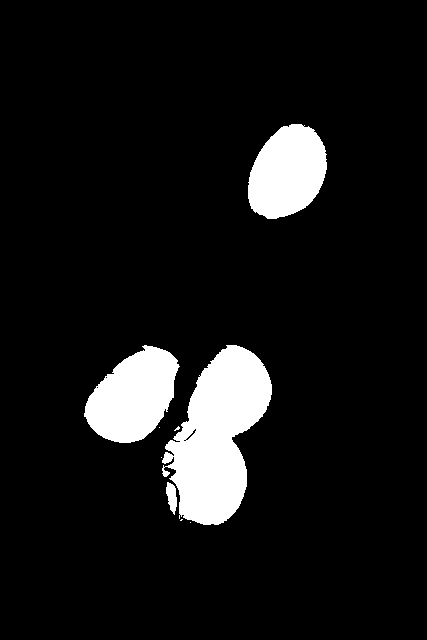

In [11]:
# Eliminación de píxeles aislados
(N,M) = seg.shape
limpia = seg.copy()
for i in range(N):
    s = np.sum(seg[i,:])
    if s<10:
        limpia[i,:] = 0
cv2_imshow(limpia*255)

In [12]:
# Búsqueda de coordenadas del rectángulo
i_min = 1000
i_max = 0
j_min = 1000
j_max = 0
for i in range(N):
    for j in range(M):
        if limpia[i,j]>0:
            if i<i_min: i_min = i
            if i>i_max: i_max = i
            if j<j_min: j_min = j
            if j>j_max: j_max = j

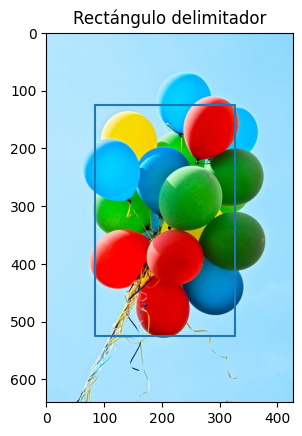

In [13]:
# Dibujo del rectángulo
y = [i_min,i_min,i_max,i_max,i_min]
x = [j_min,j_max,j_max,j_min,j_min]
plt.imshow(img)
plt.plot(x,y)
plt.title('Rectángulo delimitador')
plt.show()

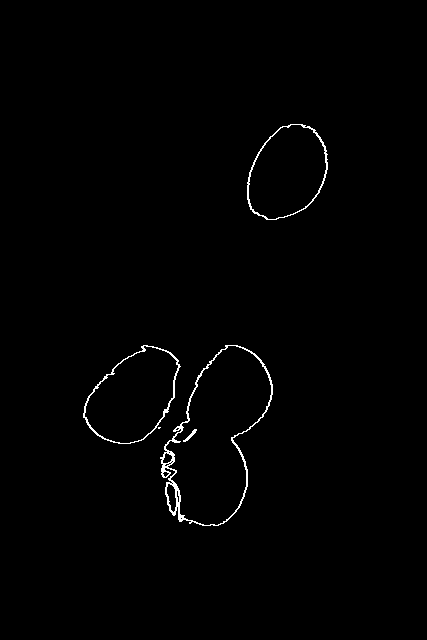

In [14]:
# Detección de bordes
borde = np.zeros((N,M),np.uint8)
# Bordes horizontales
for i in range(N):
    for j in range(1,M):
        if limpia[i,j]!=limpia[i,j-1]:
            borde[i,j] = 1
            borde[i,j-1] = 1
# Bordes verticales
for i in range(1,N):
    for j in range(M):
        if limpia[i-1,j]!=limpia[i,j]:
            borde[i,j] = 1
            borde[i,j-1] = 1
cv2_imshow(borde*255)

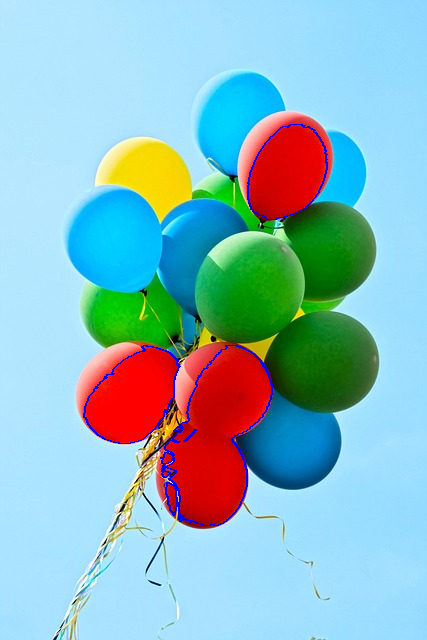

In [15]:
# Resultado final con bordes en rojo
img_final = img_cv.copy()
for i in range(N):
    for j in range(M):
        if borde[i,j]==1:
            img_final[i,j,:] = [255,0,0]
cv2_imshow(img_final)